In [7]:
%matplotlib inline

In [9]:
import sqlite3 
import pandas as pd
import json 
import matplotlib.pyplot as mpl
from collections import Counter
import xlsxwriter 

In [2]:
# https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object - will makes things easy


In [3]:
# Accessing the Structured data using Sqlite 
db_con = sqlite3.connect('Tweets.db') # creating and connecting for our database file 
c = db_con.cursor() # this will be our cursor 
c.execute('SELECT hashtags FROM TweetsDataTable') 
hashtags = [hashtag 
            for hashtag in c.fetchall()]

In [4]:
print(hashtags[15:25])

[('',), ('',), ('',), ('',), ('',), ('',), ('',), ('Alcabalasmcbo',), ('',), ('',)]


In [5]:
tags = []
for each in hashtags: 
    for single_hashtag in each:
        if len(single_hashtag) > 0:
            #print(single_hashtag)
            temp = single_hashtag.split(',')
            for i in temp:
                tags.append(i)
tag_freq = Counter(tags)            

In [12]:
tags_table = pd.DataFrame(tags, columns = ['hashtags'])
tags_table
writer = pd.ExcelWriter('hashtags_array.xlsx', engine='xlsxwriter')
tags_table.to_excel(writer, sheet_name='Sheet1')
writer.save()

#xlsxwriter(tags,')

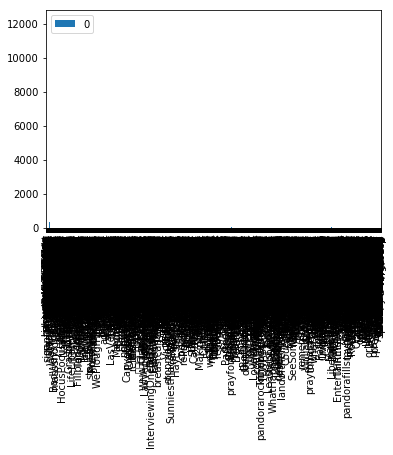

In [6]:
#print(tag_freq)
df_freq = pd.DataFrame.from_dict(tag_freq, orient= 'index')
#print(df_freq)
df_freq.plot(kind = 'bar')

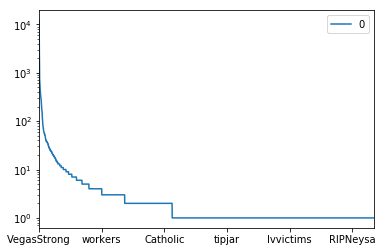

In [106]:
df_freq.sort_values(by = [0], ascending=False).plot(logy = 1)
#df_freq.plot()

C:\Users\santhosh\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: Tried to set a label via parameter 'x' in func 'hist' but couldn't find such an argument. 
(This is a programming error, please report to the matplotlib list!)
  if __name__ == '__main__':


TypeError: hist() missing 1 required positional argument: 'x'

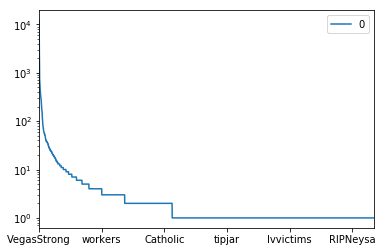

In [103]:
df_freq.sort_values(by = [0], ascending=False).plot(logy=1).hist(bins =100)
# total 75195 hashtags (not unique)
# 5347 unique hashtags

In [133]:
mat = df_freq.as_matrix

<bound method DataFrame.sort of                         0
nabnailbar              1
followme                1
fallfestival            2
Tyranny                24
R3s                     1
Metevier                2
CSASurvivors            5
AfricanAmericans        1
NorthKorea             11
reason                  1
champagneDay            1
TreeOfLife              2
thanksto1stresponders   1
WomenLeaders17          5
itsoknottobeokay        1
TranceFamily            1
rt91harvestfestival     1
GoFundMe                1
lawyer                  2
i15                     1
PrayForTexas            2
vegastrong              6
TrunkOTreat             1
Diplo                   1
lauraloomer             3
prayforpeace            4
WeAreAllKings           1
Pence                   7
WeAreDataPeople         3
History                 2
...                    ..
breaktherules           1
NewJersey               2
FoodTravelChat          1
日ハム                     1
benotafraid             1
NRAmus

In [132]:
def create_a_db():
    db_con = sqlite3.connect('Tweets.db') # creating and connecting for our database file 
    c = db_con.cursor() # this will be our  
    #c.execute('CREATE TABLE IF NOT EXISTS TwitterData (in_reply_to_status_id_str BLOB, text TEXT, coordinates BLOB, user_name TEXT, user_followers_count INTEGER, user_lang TEXT, user_default_profile TEXT, user_location TEXT, user_time_zone TEXT, user_profile_text_color TEXT, user_statuses_count INTEGER, user_protected TEXT, user_friends_count INTEGER, user_id INTEGER, user_description TEXT, user_verified TEXT, user_listed_count INTEGER, user_favourites_count INTEGER, user_created_at TEXT, user_utc_offset INTEGER, user_geo_enabled TEXT, retweet_count INTEGER, lang TEXT, geo BLOB, is_quote_status BLOB, in_reply_to_user_id BLOB, id_str TEXT, in_reply_to_user_id_str BLOB, in_reply_to_status_id BLOB, in_reply_to_screen_name BLOB, truncated BLOB, favorited BLOB, id INTEGER, source TEXT, retweeted BLOB, created_at TEXT, favorite_count INTEGER, contributors BLOB,  hashtags TEXT, urls TEXT, user_mentions TEXT, media TEXT, symbols TEXT, polls TEXT)')
    #c.execute('CREATE TABLE IF NOT EXISTS TweetsDataTable (id_n INTEGER PRIMARY KEY ASC, user_id INTEGER, user_name TEXT, user_location TEXT, text TEXT, hashtags TEXT, urls TEXT, user_mentions TEXT, symbols TEXT, retweeted TEXT, retweet_count INTEGER, in_reply_to_user_id INTEGER, in_reply_to_status_id INTEGER, in_reply_to_screen_name TEXT)')
    c.execute('CREATE TABLE IF NOT EXISTS TweetsDataTable (id_n INTEGER PRIMARY KEY ASC, created_at TEXT, user_id INTEGER, user_name TEXT, user_screen_name TEXT, user_location TEXT, text TEXT, hashtags TEXT, expanded_urls TEXT, user_mentions_screen_name TEXT, user_mentions_user_ids TEXT, symbols TEXT, retweeted TEXT, retweet_count INTEGER, in_reply_to_user_id INTEGER, in_reply_to_status_id INTEGER, in_reply_to_screen_name TEXT)')


def make_a_db():
    db_con = sqlite3.connect('Tweets.db') # creating and connecting for our database file 
    c = db_con.cursor() # this will be our 
        
    for i in range(len(dataset)):
        #in_reply_to_status_id_str = str(dataset[i]['in_reply_to_status_id_str'])
        text = str(dataset[i]['text'])
        #coordinates = str(dataset[i]['coordinates'])
        retweet_count = dataset[i]['retweet_count']
        #lang = str(dataset[i]['lang'])
        #entities = dataset[i]['entities']
        #user = dataset[i]['user']
        
        user_name = dataset[i]['user']['name']
        user_screen_name = dataset[i]['user']['screen_name']
        #user_translator_type = dataset[i]['user']['translator_type']
        #user_profile_background_tile = dataset[i]['user']['profile_background_tile']
        #user_profile_link_color = dataset[i]['user']['profile_link_color']
        #user_id_str = dataset[i]['user']['id_str']
        #user_profile_background_image_url_https = dataset[i]['user']['profile_background_image_url_https']
        #user_followers_count = dataset[i]['user']['followers_count'] 
        #user_follow_request_sent = dataset[i]['user']['follow_request_sent']
        #user_lang = str(dataset[i]['user']['lang'])
        #user_profile_sidebar_fill_color = dataset[i]['user']['profile_sidebar_fill_color'] 
        #user_default_profile = str(dataset[i]['user']['default_profile'])
        user_location = str(dataset[i]['user']['location'])
        #user_profile_use_background_image = dataset[i]['user']['profile_use_background_image'] 
        #user_time_zone = str(dataset[i]['user']['time_zone'])
        #user_profile_text_color = str(dataset[i]['user']['profile_text_color'])
        #user_profile_background_image_url = dataset[i]['user']['profile_background_image_url']
        #user_statuses_count = dataset[i]['user']['statuses_count']
        #user_protected = str(dataset[i]['user']['protected'])
        #user_default_profile_image = dataset[i]['user']['default_profile_image']
        #user_friends_count = dataset[i]['user']['friends_count']
        user_id = dataset[i]['user']['id']
        #user_description = str(dataset[i]['user']['description'])
        #user_url = dataset[i]['user']['url']
        #user_verified =  str(dataset[i]['user']['verified'])
        #user_listed_count = dataset[i]['user']['listed_count']
        #user_favourites_count = dataser[i]['user']['user_favourities_count']
        #user_created_at = str(dataser[i]['user']['created_at'])
        #user_utc_offset = str(dataser[i]['user']['utc_offset'])
        #user_geo_enabled = str(dataser[i]['user']['geo_enabled'])
        #user_profile_image_url_https = dataser[i]['user']['profile_image_url_https']
        
        
        # for i in  user['entities']['url']
        #     user_entities_urls = user['entities']['url']
        
        #     user_entities_urls user['entities']['url']
        
        
        #metadata = dataset[i]['metadata']
        #geo = str(dataset[i]['geo'])
        #is_quote_status = str(dataset[i]['is_quote_status'])
        in_reply_to_user_id = dataset[i]['in_reply_to_user_id']
        #id_str = dataset[i]['id_str']
        #in_reply_to_user_id_str = str(dataset[i]['in_reply_to_user_id_str'])
        in_reply_to_status_id = dataset[i]['in_reply_to_status_id']
        in_reply_to_screen_name = str(dataset[i]['in_reply_to_screen_name'])
        #truncated = str(dataset[i]['truncated'])
        #favorited = str(dataset[i]['favorited'])
        id_n = dataset[i]['id']
        #source = str(dataset[i]['source'])
        retweeted = str(dataset[i]['retweeted'])
        created_at = dataset[i]['created_at']
        #favorite_count = dataset[i]['favorite_count']
        #contributors = str(dataset[i]['contributors'])
        #place = dataset[i]['place']
        retweet_count = dataset[i]['retweet_count']
        hashtags = ','.join([hashtag['text'] 
                    for hashtag in dataset[i]['entities']['hashtags']])
        expanded_urls = ','.join([urls_included['expanded_url'] 
                                  for urls_included in dataset[i]['entities']['urls']])
        user_mentions_screen_name = ','.join([user_mentions['screen_name'] 
                                              for user_mentions in dataset[i]['entities']['user_mentions']])
        user_mentions_user_ids = ','.join(str(x) for x in [user_mentions['id'] 
                                                           for user_mentions in dataset[i]['entities']['user_mentions']])
        #media = str(dataset[i]['entities']['media'])
        symbols = str(dataset[i]['entities']['symbols'])
        #polls = str(dataset[i]['entities']['polls'])
        c.execute('''INSERT OR IGNORE INTO TweetsDataTable(id_n, created_at, user_id, user_name, user_screen_name, user_location, text, hashtags, expanded_urls, user_mentions_screen_name, user_mentions_user_ids, symbols, retweeted, retweet_count, in_reply_to_user_id, in_reply_to_status_id, in_reply_to_screen_name) Values(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)''',(id_n, created_at, user_id, user_name, user_screen_name, user_location, text, hashtags, expanded_urls, user_mentions_screen_name, user_mentions_user_ids, symbols, retweeted, retweet_count, in_reply_to_user_id, in_reply_to_status_id, in_reply_to_screen_name))
        db_con.commit()
    c.close()
    db_con.close()
        
        
        
#create_a_db()
make_a_db()
        
    

NameError: name 'dataset' is not defined

In [94]:
#for i in  dataset[1]['user']['entities']['url']['urls']:
print(len(dataset[3]['user']['entities']))
#print(user['entities']['url']['urls'][0]['expanded_url'])
#print(user['entities']['url']['urls'][0]['display_url'])
#print(user['entities']['url']['urls'][0]['url'])
#print(user['entities']['url']['urls'][0]['indices'])
print

2


<function print>

In [7]:
len(dataset)
i = 1
in_reply_to_status_id_str = dataset[i]['in_reply_to_status_id_str']
text = dataset[i]['text']
coordinates = dataset[i]['coordinates']
retweet_count = dataset[i]['retweet_count']
lang =dataset[i]['lang']
entities = dataset[i]['entities']
user = dataset[i]['user']
metadata = dataset[i]['metadata']
geo = dataset[i]['geo']
is_quote_status = dataset[i]['is_quote_status']
in_reply_to_user_id = dataset[i]['in_reply_to_user_id']
id_str = dataset[i]['id_str']
in_reply_to_user_id_str = dataset[i]['in_reply_to_user_id_str']
in_reply_to_status_id = dataset[i]['in_reply_to_status_id']
in_reply_to_screen_name = dataset[i]['in_reply_to_screen_name']
truncated = dataset[i]['truncated']
favorited = dataset[i]['favorited']
id_n = dataset[i]['id']
source = dataset[i]['source']
retweeted = dataset[i]['retweeted']
created_at = dataset[i]['created_at']
favorite_count = dataset[i]['favorite_count']
contributors = dataset[i]['contributors']
place = dataset[i]['place']
print(text)

Wonderful #HarvestFestival thinking about mustard seeds and their impact when God gets involved. Great to welcome Caroline from the Diocese


In [48]:
h = ','.join([hashtag['text']
     for hashtag in dataset[4]['entities']['hashtags']])
print((h))

sonomacounty,ワインのある暮らし,ワイン好き,harvestfestival


In [14]:
type(str(dataset[1]))

str

In [26]:
print (json.dumps(dataset[1]['coordinates'], indent = 4))

null


In [62]:
print(','.join(str(x) for x in [user_mentions['id']
                for user_mentions in dataset[2]['entities']['user_mentions']]))


356863756


In [73]:
print(','.join([urls_included['expanded_url'] 
                for urls_included in dataset[6]['entities']['urls']]))

https://www.instagram.com/p/BZ_xLujl59N/
